# Tunnel Current Amplitudes @ MiTMoJCo
**Dmitry R. Gulevich <br>
ITMO University, St Petersburg, Russia**

This Jupyter notebook is part of MiTMoJCo distributed under GNU General Public License v3.0. 
Using this notebook you will be able to create new fits of tunnel current amplitudes for 
arbitrary temperature, superconducting gaps and Riedel peak smoothing parameter.

### Contents:
* Section 1: Tunnel current amplitudes from BCS.
* Section 2: Smoothing Riedel peaks in tunnel current amplitudes.
* Section 3: Fitting tunnel current amplitudes by complex exponentials

### References:
1. A. I. Larkin and Yu. N. Ovchinnikov, Sov. Phys. JETP 24, 1035 (1967).
2. D. R. Gulevich, V. P. Koshelets, and F. V. Kusmartsev, Phys. Rev. B 96, 024515 (2017).
3. A. B. Zorin, I. O. Kulik, K. K. Likharev, and J. R. Schrieffer, Sov. J. Low Temp. Phys. 5, 537 (1979).
4. D. R. Gulevich, V. P. Koshelets, F. V. Kusmartsev, arXiv:1709.04052 (2017).
5. D. R. Gulevich, L. V. Filippenko, V. P. Koshelets, arXiv:1809.01642 (2018).
6. A. A. Odintsov, V. K. Semenov and A. B. Zorin, IEEE Trans. Magn. 23, 763 (1987).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import mitmojco # MiTMoJCo module for tunnel current amplitudes

## Section 1: Tunnel current amplitudes from BCS

In this section we calculate tunnel current amplitudes (TCA) given by the BCS theory. Function **mitmojco.tca_bcs** evaluates expressions of Larkin and Ovchinnikov [1] summarized in Appendix of Ref.[2].

In [2]:
###-----------------------------------------------
### Input parameters
###-----------------------------------------------

T=4.2 # temperature in Kelvin
Delta1 = 1.4 # meV
Delta2 = 2.3 # meV

In [3]:
### mitmojco.tca_bcs returns BCS TCAs as functions of frequency in units of the gap frequency.
### TCAs are in units Vg/Rn, where Vg -- gap voltage, Rn -- normal resistance.
Jpair,Jqp = mitmojco.tca_bcs(T, Delta1, Delta2)

In [4]:
### data points for plotting (use 500 or more points to resolve Riedel peaks)
xpoints=np.linspace(0.001,2,500)

start_time = time.time()

print('# Calculating Jpair...')
Jpair_xpoints = Jpair(xpoints)

print('# Calculating Jqp...')
Jqp_xpoints = Jqp(xpoints)

print('# Timing: %.f' % (time.time()-start_time),' seconds')

# Calculating Jpair...
# Calculating Jqp...
# Timing: 4  seconds


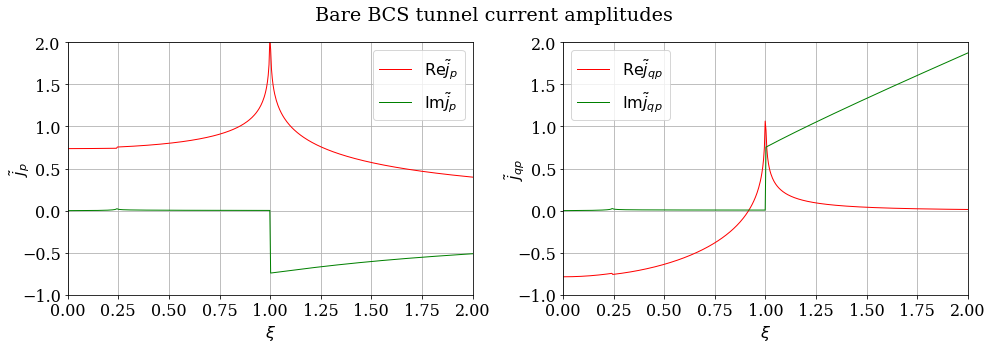

In [5]:
###--------------------------------------------------------
###   Plot BCS tunnel current amplitudes
###--------------------------------------------------------

plt.rc('font', family='serif', size=16)
fig, ax = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle("Bare BCS tunnel current amplitudes")

lw=1
ax[0].plot(xpoints,Jpair_xpoints.real, color='r', lw=lw, label=r'${\rm Re} \tilde{j}_p$')
ax[0].plot(xpoints,Jpair_xpoints.imag, color='g', lw=lw, label=r'${\rm Im} \tilde{j}_p$')
ax[1].plot(xpoints,Jqp_xpoints.real, color='r', lw=lw, label=r'${\rm Re} \tilde{j}_{qp}$')
ax[1].plot(xpoints,Jqp_xpoints.imag, color='g', lw=lw, label=r'${\rm Im} \tilde{j}_{qp}$')

ax[0].set_xlabel(r'$\xi$')
ax[0].set_ylabel(r'$\tilde{j}_p$',labelpad=-10)
ax[0].set_xlim([0,2])
ax[0].set_ylim([-1,2])

ax[1].set_xlabel(r'$\xi$')
ax[1].set_ylabel(r'$\tilde{j}_{qp}$',labelpad=-10)
ax[1].set_xlim([0,2])
ax[1].set_ylim([-1,2])

ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()

plt.tight_layout()
fig.subplots_adjust(top=0.88) # suptitle fix after tight_layout() call 

## Section 2: Smoothing Riedel peaks in tunnel current amplitudes

The smoothing procedure is implemented as described in Ref. [3]. See also Ref.[2,4,5] for exact expressions.


In [6]:
###-----------------------------------------------
### Input parameters
###-----------------------------------------------

dsm=0.015 # smoothing parameter delta in Ref.[3]

In [7]:
Jpair_smooth, Jqp_smooth = mitmojco.tca_smbcs(T, Delta1, Delta2, dsm)

# Asymmetric junction (Delta1!=Delta2)


In [8]:
###----------------------------------------------------------
###   Export data arrays for fitting: x, Jpair_data, Jqp_data
###----------------------------------------------------------

Ndata=500 # number of frequency points for fitting
print('# Number of frequency points for fitting Ndata = ', Ndata)
x=np.linspace(0.001,2.,Ndata)

start_time = time.time()

Jpair_data = Jpair_smooth(x)
Jqp_data = Jqp_smooth(x)

print('# Timing: %.f' % (time.time()-start_time),' seconds')

# Number of frequency points for fitting Ndata =  500
# Timing: 4  seconds


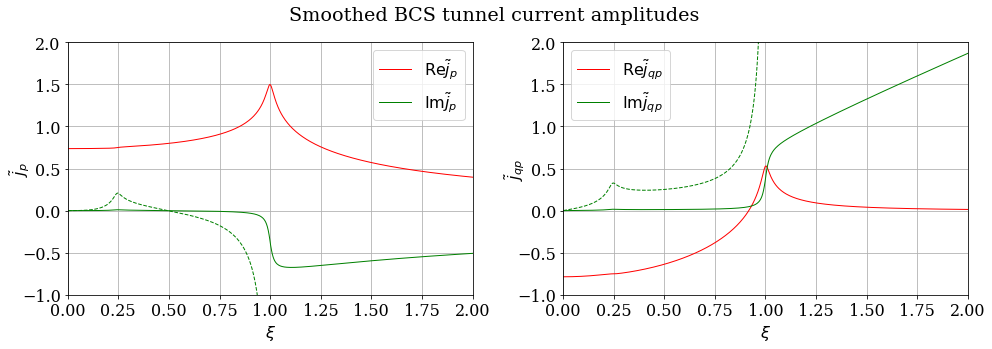

In [9]:
###--------------------------------------------------------
###   Plot smoothed tunnel current amplitudes
###--------------------------------------------------------

plt.rc('font', family='serif', size=16)
fig, ax = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle("Smoothed BCS tunnel current amplitudes")

lw=1
ax[0].plot(x,Jpair_data.real, color='r', lw=lw, label=r'${\rm Re} \tilde{j}_p$')
ax[0].plot(x,Jpair_data.imag, color='g',lw=lw, label=r'${\rm Im} \tilde{j}_p$')
ax[0].plot(x,20*Jpair_data.imag, color='g',lw=lw,ls='dashed')
ax[1].plot(x,Jqp_data.real, color='r',lw=lw, label=r'${\rm Re} \tilde{j}_{qp}$')
ax[1].plot(x,Jqp_data.imag, color='g',lw=lw, label=r'${\rm Im} \tilde{j}_{qp}$')
ax[1].plot(x,20*Jqp_data.imag, color='g',lw=lw,ls='dashed')

# s=3
# ax[0].scatter(x,Jpair_data.real, color='k', s=s)
# ax[0].scatter(x,Jpair_data.imag, color='k',s=s)
# ax[0].scatter(x,20*Jpair_data.imag, color='k',s=s)
# ax[1].scatter(x,Jqp_data.real, color='k',s=s)
# ax[1].scatter(x,Jqp_data.imag, color='k',s=s)
# ax[1].scatter(x,20*Jqp_data.imag, color='k',s=s)

ax[0].set_xlabel(r'$\xi$')
ax[0].set_ylabel(r'$\tilde{j}_p$',labelpad=-10)
ax[0].set_xlim([0,2])
ax[0].set_ylim([-1,2])

ax[1].set_xlabel(r'$\xi$')
ax[1].set_ylabel(r'$\tilde{j}_{qp}$',labelpad=-10)
ax[1].set_xlim([0,2])
ax[1].set_ylim([-1,2])

ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()

plt.tight_layout()
fig.subplots_adjust(top=0.88) # suptitle fix after tight_layout() call 

## Section 3: Fitting tunnel current amplitudes by complex exponentials

Fitting of tunnel current amplitudes by sums of complex exponentials as proposed in Ref.[6]. See Ref.[2,4,5] for implementation of the fitting procedure.

In [10]:
###-----------------------------------------------
### Input parameters
###-----------------------------------------------

maxNterms = 8 # number of complex exponentials
thr = 0.2 # ratio of absolute and relative tolerances (equal to $\tau_a/\tau_r$ in Ref.[2])

In [11]:
cpars, Jpair_model, Jqp_model = mitmojco.new_fit(x, Jpair_data, Jqp_data, maxNterms, thr)

# Nterms = 2 with new term at frequency 1.000000. Calculating...
p= array([-1.01323561+0.59033783j, -0.1135658 +0.99450862j])
A= array([1.36421467+0.72471456j, 0.12802471+0.01559746j])
B= array([-0.2921042 +1.27586479j,  0.13732818+0.05411631j])

# Nterms = 3 with new term at frequency 0.978467. Calculating...
p= array([-1.53091514+0.42975574j, -0.0485579 +1.00270189j,
       -0.30192656+0.97858584j])
A= array([1.40951835+1.25674305j, 0.04892914-0.00126471j,
       0.2238523 -0.02209745j])
B= array([-0.41313319+2.57515136e+00j,  0.04589654+2.01029972e-03j,
        0.22111251+1.72095793e-01j])

# Nterms = 4 with new term at frequency 0.986479. Calculating...
p= array([-2.35717898+0.34800951j, -0.03273158+1.00141083j,
       -0.15812621+1.00107595j, -0.62910898+0.95086485j])
A= array([1.35480122+1.88234974e+00j, 0.02397118-1.98493909e-03j,
       0.11458452+4.06865474e-04j, 0.36806094-1.16857119e-01j])
B= array([-0.59466313+5.32146864e+00j,  0.02439614+2.43513255e-04j,
        0.11188991

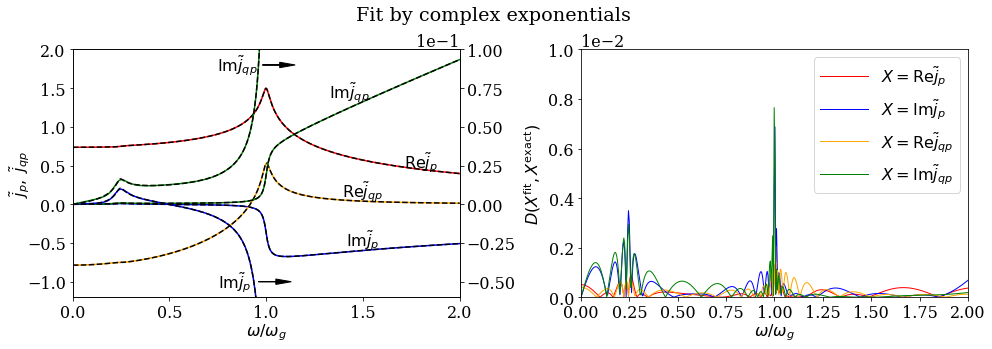

In [12]:
### ------------- Display fit -----------------

plt.rc('font', family='serif', size=16)
fig, ax = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle("Fit by complex exponentials")

# plot Re pair
ax[0].plot(x,Jpair_model.real, 'red',lw=1.5,label=r'${\rm Re} \tilde{j}_p$')
ax[0].plot(x,Jpair_data.real, 'k',lw=1.5,ls='dashed',zorder=2,label=r'$\rm exact$')

# plot Im pair
ax[0].plot(x,Jpair_model.imag, 'blue',lw=1.5,label=r'${\rm Im} \tilde{j}_p$')
ax[0].plot(x,Jpair_data.imag, 'k',lw=1.5,ls='dashed',zorder=2)

# plot Re qp
ax[0].plot(x,Jqp_model.real, 'orange',lw=1.5,label=r'${\rm Re} \tilde{j}_{qp}$')
ax[0].plot(x,Jqp_data.real, 'k',lw=1.5,ls='dashed',zorder=2)

# plot Im qp
ax[0].plot(x,Jqp_model.imag, 'green',lw=1.5,label=r'${\rm Im} \tilde{j}_{qp}$')
ax[0].plot(x,Jqp_data.imag, 'k',lw=1.5,ls='dashed',zorder=2)

# plot zoom of Im pair
twax0=ax[0].twinx()
twax0.set_ylim(np.array([-1.2,2])*0.05)
line3,=twax0.plot(x,Jpair_model.imag,'blue',lw=1.5,ls='solid')
twax0.plot(x,Jpair_data.imag, 'k',lw=1.5,ls='dashed',zorder=2)
twax0.tick_params(axis='y', which='major', labelsize=16)
twax0.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
twax0.set_xlim([0,2])

# plot zoom of Im qp
twax1=twax0
twax1.set_ylim(np.array([-1.2,2])*0.05)
line_Imqp30,=twax1.plot(x,Jqp_model.imag, 'green',lw=1.5,ls='solid')
twax1.plot(x,Jqp_data.imag, 'k',lw=1.5,ls='dashed',zorder=2)
twax1.tick_params(axis='y', which='major', labelsize=16)
twax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
twax1.set_xlim([0,2])

# plot arrows
ax[0].arrow(0.98, 1.8, 0.09, 0., head_width=0.07, head_length=0.08, fc='k', ec='k')
ax[0].arrow(0.96, -1, 0.09, 0., head_width=0.07, head_length=0.08, fc='k', ec='k')

# plot figure labels (a) and (b)
#ax[0].text(0.06,0.93,"(a)",transform=ax[0].transAxes,fontsize=20,horizontalalignment='center',verticalalignment='center')
#ax[1].text(0.06,0.93,"(b)",transform=ax[1].transAxes,fontsize=20,horizontalalignment='center',verticalalignment='center')

# plot labels next to the lines
ax[0].text(1.8,0.55,r'${\rm Re} \tilde{j}_p$',horizontalalignment='center',verticalalignment='center')
ax[0].text(1.5,0.17,r'${\rm Re} \tilde{j}_{qp}$',horizontalalignment='center',verticalalignment='center')
ax[0].text(1.5,-0.46,r'${\rm Im} \tilde{j}_p$',horizontalalignment='center',verticalalignment='center')
ax[0].text(1.43,1.45,r'${\rm Im} \tilde{j}_{qp}$',horizontalalignment='center',verticalalignment='center')
ax[0].text(0.84,-1.0,r'${\rm Im} \tilde{j}_p$',horizontalalignment='center',verticalalignment='center')
ax[0].text(0.85,1.8,r'${\rm Im} \tilde{j}_{qp}$',horizontalalignment='center',verticalalignment='center')

# set axis properties
ax[0].set_xlabel(r'$\omega/\omega_g$',labelpad=0)
ax[0].set_ylabel(r'$\tilde{j}_p,\; \tilde{j}_{qp}$',labelpad=-5)
ax[0].set_xlim([0,2])
ax[0].set_ylim([-1.2,2])
ax[0].set_xticks([0,0.5,1.0,1.5,2.0])

# plot relative errors
l1,=ax[1].plot(x,mitmojco.Drel(Jpair_model.real,Jpair_data.real,thr), 'r',lw=1,ls='solid',label=r'$X={\rm Re} \tilde{j}_{p}$')
l2,=ax[1].plot(x,mitmojco.Drel(Jpair_model.imag,Jpair_data.imag,thr), 'b',lw=1,ls='solid',label=r'$X={\rm Im} \tilde{j}_{p}$')
l3,=ax[1].plot(x,mitmojco.Drel(Jqp_model.real,Jqp_data.real,thr), 'orange',ls='solid',lw=1,label=r'$X={\rm Re} \tilde{j}_{qp}$')
l4,=ax[1].plot(x,mitmojco.Drel(Jqp_model.imag,Jqp_data.imag,thr), 'g', ls='solid',lw=1,label=r'$X={\rm Im} \tilde{j}_{qp}$')

ax[1].set_xlabel(r'$\omega/\omega_g$',labelpad=0)
ax[1].set_ylabel(r'$D(X^{\rm fit},X^{\rm exact})$',labelpad=5)
ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1].set_xlim([0,2])
ax[1].set_ylim([0,1e-2])
ax[1].legend(handles=[l1,l2,l3,l4], loc='upper right',fontsize=16,ncol=1,handlelength=3)

plt.tight_layout()
fig.subplots_adjust(top=0.86) # suptitle fix after tight_layout() call 
#plt.savefig("tunnel_current_amplitudes.png") # save figure to png

In [13]:
# Save parameters p,A,B to file
mitmojco.parsave(cpars,'tunnel_current_amplitudes.fit')


# Parameters saved to file tunnel_current_amplitudes.fit
